## Project : Investigate a Dataset - [No-show Appointments]

## Table of contents
 .Introduction
 
 .Data Wrangling
 
 .Exploratory Data Analysis
 
 .Conclusions

# 1.0 Introduction 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
Some of the questions I will be investigating include;
      
   1.What factors are important for us to know in order to predict whether a patient will show up for their scheduled          appointment?
   
   2.Is the age likely to affect a patient's showing up for a scheduled appointment?
   
   3.Which gender is more likely not to show up for their scheduled appointment?
   
   4.Do patients suffering from hypertension likely to whow up for their appointments? 
   
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

# 2.0 Description about the Dataset for the Project

The project investigates the no-show appointments dataset.
A short description about the columns of the dataset are as follows:

    - PatientId: identification number for the patient
    - AppointmentId: appointment identification for the patient
    - Gender: whether the patient is male or female
    - ScheduledDay: day for scheduled appointment
    - AppointmentDay: day for the appointment
    - Age: age of the patient
    - Neighbourhood: residense of the patient 
    - Scholarship: indicates whether the patient is enrolled in Brasilian welfare program
    - Hypertension: indicates whether a patient is sufferingfrom this condition
    - Diabetes: indicates whether a patient is sufferingfrom this condition
    - Alcoholism: indicates whether a patient is sufferingfrom this condition
    - Handcap: indicates whether the patient is physically handcapped
    - SMS_received: whether they received a message notofication
    - No_show: if yes the patient did not show up, if no they showed up
        



## 2.1 Load Data and Libraries

In [17]:
#Load the required libraries for analysis

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 


df = pd.read_csv("noshowappointments_kagglev2_may_2016.csv")



## 2.2 Overview of the  Data
We will have a quick overview to know what the data looks like.


In [18]:
#Summary of the first five rows
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:

#Number of rows and columns 
df.shape

(110527, 14)

In [20]:

#Description of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



The data seems to be fine and we therefore move to the next process which is Data Wrangling.

## 2.3 Renaming columns

In [33]:
#Writing a function to rename columns of the data

In [34]:

#Changing column names to lower case
def df_rename_cols(df,col_name_dict):
    df.rename(columns=col_name_dict,inplace=True)


In [35]:
df_rename_cols(df,lambda x:x.lower().replace('-','_'))

In [36]:
#Renaming columns
df.rename(columns = {'patient_id': 'patient_id', 'appointmentid' : 'appointment_id', 'scheduledday' : 'scheduled_day', 'hipertension' : 'hypertension', 'handcap' : 'handicap', 'appointmentday' : 'appointment_day', 'no-show' : 'no_show' }, inplace=True)


In [37]:
#Confirming changes
df.head(4)

,patientid,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No



# 3.0 Data Wrangling

In [92]:
#Checking for missing data
df.isnull().sum()


patientid          0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
dtype: int64

In [93]:
#Checking for duplicates
df.duplicated().sum()


0

In [94]:
#Checking for data types of columns
df.dtypes

patientid          float64
appointment_id       int64
gender              object
scheduled_day       object
appointment_day     object
age                  int64
neighbourhood       object
scholarship          int64
hypertension         int64
diabetes             int64
alcoholism           int64
handicap             int64
sms_received         int64
no_show             object
dtype: object

In [95]:
#Assertaining data types
df['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

In [96]:
#Neigbourhood where patients come from
df['neighbourhood'].value_counts()


JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

There are 81 neighbourhoods from which the patients came from. Therefore, the patients need to be categorised according to their locality.


In [97]:
df['handicap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

In [99]:
#Summary of the data
df.describe()

,patientid,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [100]:
#Obtaining minimum age
df['age'].min()

-1

There is an outlier in the age column. We cannot have a negative value for age (from the table, the minimum value of age is 1)
We therefore change -1 to 1 since there might be an error when keying in the value.

In [101]:

#If age is negative multiply it with -1 to be positive
df[df['age'] < 0]
df['age'] = df['age'].apply(lambda x: x*-1 if x < 0 else x)


In [102]:
#Confirming changes made to age
df['age'].min()

0

Age values which are 0 are assumed to be babies who are months old.



In [103]:
#Value counts for no show
df['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

In [104]:
#Value counts for hypertension
df['hypertension'].value_counts()

0    88726
1    21801
Name: hypertension, dtype: int64

In [105]:
#Value counts for alcoholism
df['alcoholism'].value_counts()

0    107167
1      3360
Name: alcoholism, dtype: int64

No missing values or duplicates were encountered in the data. However, the data types of some of the columns are not correct. Their data types should be as follows:
  * gender, neighbourhood and handicap need to be of "category" data type
  * scholarship, hypertension, diabetes, alcoholism and sms_received need to be of "bool" data type
  * scheduled_day and appointment_day need to be of "datetime" data type
  * no_show column needs to depict 'No' as 0 and 'Yes' as 1  

In [106]:
#Depict 'No' as 0 and 'yes' as 1
df['no_show'].replace({'No' : 0, 'Yes' : 1}, inplace = True)

In [107]:
#Change data types for gender, neighbourhood and handicap
for column in ['gender', 'neighbourhood', 'handicap'] :
    df[column] = df[column].astype('category')
    

In [108]:
#Change data type for scholarship, hypertension, diabetes, alcoholism and sms_received
for column in ['scholarship', 'hypertension', 'diabetes', 'alcoholism', 'sms_received'] :
    df[column] = df[column].astype('bool')
    

In [109]:
#Change data type for scheduled_day and appointment_day
for column in ['scheduled_day', 'appointment_day']:
    df[column] = pd.to_datetime(df[column])

In [111]:
#Dropping appointment_id column
df.drop('appointment_id', axis=1, inplace=True)

In [113]:

#Confirming the changes made to the data
df.head(3)

,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,0
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,0
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,0


In [115]:
#Confirming data types after changes
df.dtypes

patientid                      float64
gender                        category
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                 category
scholarship                       bool
hypertension                      bool
diabetes                          bool
alcoholism                        bool
handicap                      category
sms_received                      bool
no_show                          int64
dtype: object


Since the data has been cleaned , we move to the next phase which is Exploratory Data Analysis(EDA)



#  4.0 Exploratory Data Analysis

In this phase, we are going to use statistical analysis and visualizations to establish features that are likely to influence whether a patient shows up for an appointment or not.
In particular, we are going to answer the following questions:

1. What factors are important for us to know in order to predict whether a patient will show up for their scheduled appointment?
2. Is the age likely to affect a patient's showing up for a scheduled appointment?
3. Which gender is more likely not to show up for their scheduled appointment?
4. Do patients suffering from hypertension likely to whow up for their appointments?

### 4.1 What factors are important for us to know in order to predict whether a patient will show up for th eir scheduled appointment?

In [116]:
#Establishing the correlation between the features
df.corr().style.background_gradient(cmap='Reds')

,patientid,age,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show
patientid,1.000000,-0.004138,-0.002880,-0.006441,0.001605,0.011011,-0.009749,-0.001461
age,-0.004138,1.000000,-0.092458,0.504586,0.292392,0.095811,0.012643,-0.060319
scholarship,-0.002880,-0.092458,1.000000,-0.019729,-0.024894,0.035022,0.001194,0.029135
hypertension,-0.006441,0.504586,-0.019729,1.000000,0.433086,0.087971,-0.006267,-0.035701
diabetes,0.001605,0.292392,-0.024894,0.433086,1.000000,0.018474,-0.014550,-0.015180
alcoholism,0.011011,0.095811,0.035022,0.087971,0.018474,1.000000,-0.026147,-0.000196
sms_received,-0.009749,0.012643,0.001194,-0.006267,-0.014550,-0.026147,1.000000,0.126431
no_show,-0.001461,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,0.126431,1.000000



It can be seen that the highest correlation is for hypertension and age, hypertension and diabetes, and diabetes and age.

### Histogram of the data

array([[<AxesSubplot:title={'center':'patientid'}>,
        <AxesSubplot:title={'center':'scheduled_day'}>],
       [<AxesSubplot:title={'center':'appointment_day'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'no_show'}>, <AxesSubplot:>]],
      dtype=object)

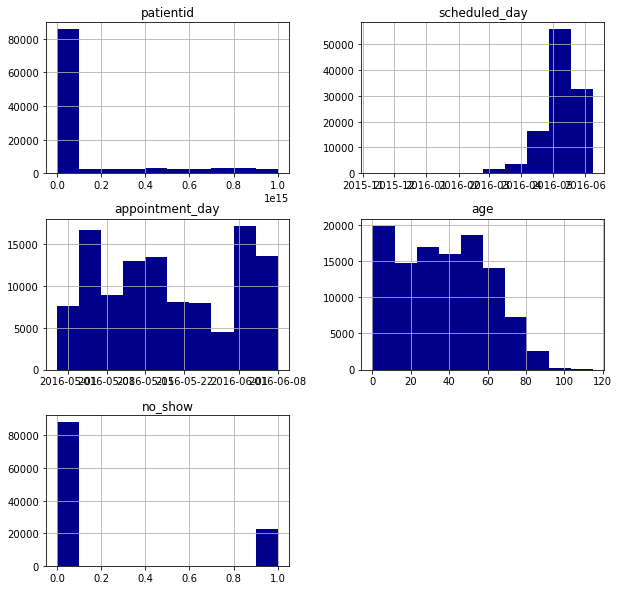

In [117]:
#Histogram of our data
df.hist(figsize=(10,10), color='darkblue')

In [118]:
#Obtain the total number of those who showed up and those who did not
no_show_data = df['no_show'].value_counts()
print(no_show_data)

0    88208
1    22319
Name: no_show, dtype: int64


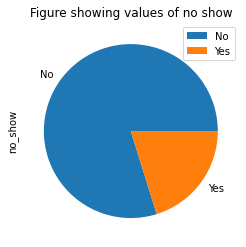

In [24]:
#A pie chart elaborating no show
df['no_show'].value_counts().plot.pie()
plt.title('Figure showing values of no show')
plt.legend()

In [122]:

df['no_show'].value_counts()

0    88208
1    22319
Name: no_show, dtype: int64

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

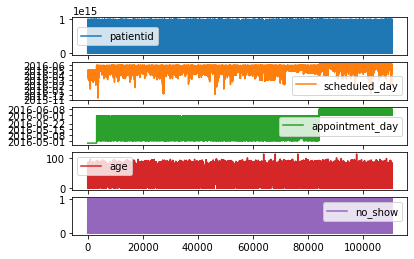

In [121]:
#A subplot of the data
df.plot(subplots=True)

Text(0, 0.5, 'Number of Appointments')

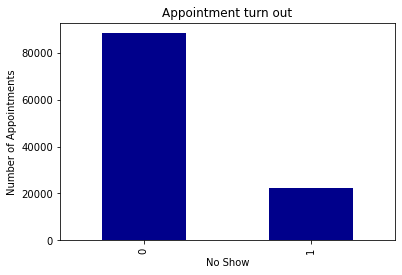

In [120]:
# Bar plot showing those who showed up and those who did not

df['no_show'].value_counts().plot(kind='bar', color='darkblue')
plt.title('Appointment turn out')
plt.xlabel('No Show')
plt.ylabel('Number of Appointments')

1 represents patients who did not show up, while 0 represents those who shed up for their appointment.


###  4.2 Establishing how each feature relates to no_show
i)Gender

In [123]:
gender = df.groupby('gender')['no_show'].mean()
print(gender)

gender
F    0.203146
M    0.199679
Name: no_show, dtype: float64


As observed above, gender does not have a high significance to determine whether a patient shows up for appointment or not both males and females do not show up approximately 20% of their appointments.

ii)Hypertension


In [124]:
hypertension = df.groupby('hypertension')['no_show'].mean()
print(hypertension)


hypertension
False    0.209037
True     0.173020
Name: no_show, dtype: float64


Hypertention on the other hand has a small effect as patients with hypertension are 3% more likely to show up for their appointments as compared to those without hypertension.

iii)Alcohol

In [42]:
alcohol = df.groupby('alcoholism')['no_show'].mean()
print(alcohol)

alcoholism
False    0.201946
True     0.201488
Name: no_show, dtype: float64


Alcoholism does not seem to affect no shows

iv)Diabetes

In [43]:
diabetes = df.groupby('diabetes')['no_show'].mean()
print(diabetes)

diabetes
False    0.203628
True     0.180033
Name: no_show, dtype: float64


Diabetes has a small significance at determining no shows since 2% more are high likely to show up.

### 4.3 Is the age likely to affect a patient's showing up for a scheduled appointment?

Text(0.5, 1.0, 'Distribution of Age')

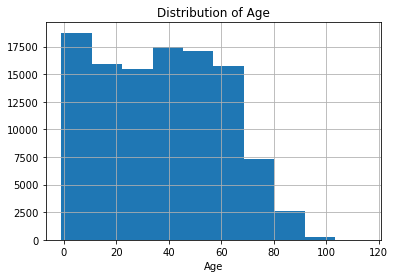

In [11]:
df['age'].hist(bins=10)
plt.xlabel('Age')
plt.title('Distribution of Age')

The following is observed:

As observed, majority of patients who had appointments belong to the age brackets (0 - 10) and (50 - 60) whle tge least age bracket is(90 - 100)


In [45]:
#Creating variaables
missed = df['no_show'] == 1
showed = df['no_show'] == 0


Text(0, 0.5, 'Count')

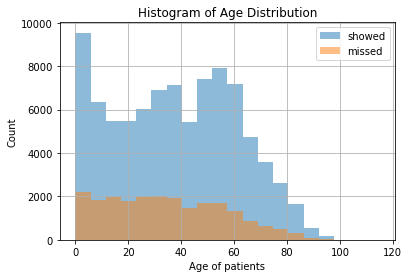

In [47]:
#Histogram showing age distribution of patients

df[showed].age.hist(alpha=0.5, bins=20, label='showed')
df[missed].age.hist(alpha=0.5, bins=20, label='missed')
plt.legend();
plt.title('Histogram of Age Distribution')
plt.xlabel('Age of patients')
plt.ylabel('Count')

The above histogram shows the age distribution of patients who showed up for the appointments and those who did not.

Grouping the age

In [48]:
#Grouping the age so as to obtain which age group did not show up 
bins=[0,10,20,30,40,50,60,70,80,90,110,120]
df['age_group'] = pd.cut(df.age, bins=bins)
age_grouped = df.groupby('age_group')['no_show'].value_counts()


In [49]:
print(age_grouped)

age_group   no_show
(0, 10]     0          12062
            1           3149
(10, 20]    0           9791
            1           3308
(20, 30]    0          10389
            1           3394
(30, 40]    0          11820
            1           3232
(40, 50]    0          11550
            1           2870
(50, 60]    0          12940
            1           2721
(60, 70]    0           9541
            1           1648
(70, 80]    0           4832
            1            889
(80, 90]    0           2137
            1            407
(90, 110]   0            244
            1             59
(110, 120]  1              3
            0              2
Name: no_show, dtype: int64


Text(0.5, 1.0, 'Distribution of ages in missed appointments')

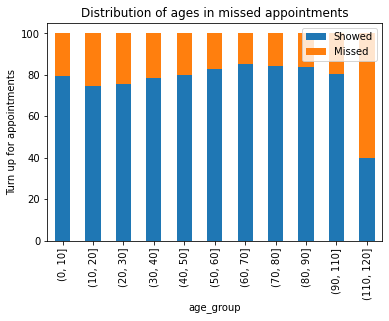

In [51]:
(age_grouped/age_grouped.groupby(level=0).sum()*100).unstack().plot(kind='bar', stacked='True')
plt.legend(['Showed','Missed'])
plt.ylabel('Turn up for appointments')
plt.title('Distribution of ages in missed appointments')

Patients in age brackets (10-20), (20-30),and (110-120) are more likely to miss their appointments.
Children and patients in their 60s, 70s and 80 are more likely to show up for their appointments.

## What age bracket is likely not to show up for appointments?

For clarity, we divide the ages of the patient as follows :

below 18, 18-24, 25-34, 35-44, 45-54, 55-64, more than 65.

In [43]:
def age(data,rows,s1,s2):
    """ The function creates a category of ages to have a better understanding
    of patients in which  age bracket is likely not toshow up for an appointment:
    
    data : It takes the original value that will be divided by it
    rows : It takes the column's name
    r1 : the lower limit of the column.
    r2 : the higher limit of the column
    
    a new dataframe with all columns in the original one but only the rows which meet the condition.

    """
    if s2 < s1 :
        s1 , s2 = s2 , s1
        
    return data.query(f"{s1} <= {rows} <= {s2}")

In [45]:
#get dataframes for each age category
childs = df.query('age < 18')
age_18 = age(df,"age",18,24)
age_25 = age(df,'age',25,34)
age_35 = age(df,'age',35,44)
age_45 = age(df,'age',45,54)
age_55 = age(df,'age',55,64)
old = df.query('age >= 65')

In [58]:
#calculate mean for each age category
sum_childs = childs['no_show'].sum()
sum_age_18 = age_18['no_show'].sum()
sum_age_25 = age_25['no_show'].sum()
sum_age_35 = age_35['no_show'].sum()
sum_age_45 = age_45['no_show'].sum()
sum_age_55 = age_55['no_show'].sum()
sum_old = old['no_show'].sum()

The plot:

Text(0, 0.5, 'Average "No-show"')

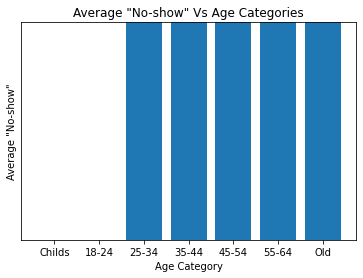

In [61]:
locations = [1,2,3,4,5,6,7]
heights = [mean_childs,mean_age_18,mean_age_25,mean_age_35,mean_age_45,mean_age_55,mean_old]
labels = ['Childs','18-24','25-34','35-44','45-54','55-64','Old']

plt.bar(locations,heights,tick_label = labels)
plt.title('Average "No-show" Vs Age Categories')
plt.ylim([1.9,1.5]) #to focus on this spot to notice the change
plt.xlabel('Age Category')
plt.ylabel('Average "No-show"')


### 4.4 Which gender is more likely not to show up for their scheduled appointment?

In [55]:
#Percentage of male and female in the dataset
print(round(df.gender.value_counts()/len(df)*100))

F    65.0
M    35.0
Name: gender, dtype: float64


Women constitute 65% of the data while male are 35%.

Bar chart for gender

Text(0, 0.5, 'Total Count')

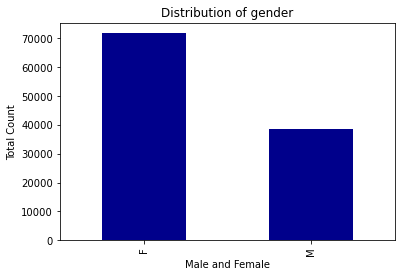

In [77]:
#Barchart for gender

df.gender.value_counts().plot(kind='bar', color='darkblue')
plt.title('Distribution of gender')
plt.xlabel('Male and Female')
plt.ylabel('Total Count')


The number of females is greater than the number of males.

In [84]:
#Getting to know no show by gender
gender_group = df.groupby('gender')['no_show'].value_counts()
print(gender_group)

gender  no_show
F       0          57246
        1          14594
M       0          30962
        1           7725
Name: no_show, dtype: int64


Text(0.5, 1.0, 'Distribution of gender in missed appointments')

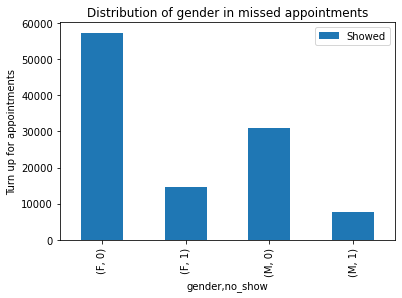

In [71]:
gender_group.plot(kind='bar', stacked='True')
plt.legend(['Showed','Missed'])
plt.ylabel('Turn up for appointments')
plt.title('Distribution of gender in missed appointments')

Text(0.5, 1.0, 'Distribution of gender in missed appointments')

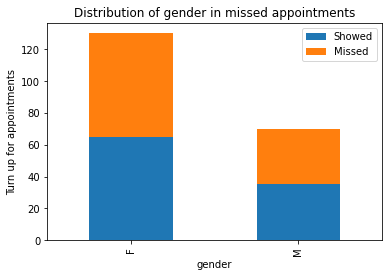

In [82]:
#Stacked bar chart showing gender of no show
(gender_group/gender_group.groupby(level=1).sum()*100).unstack().plot(kind='bar', stacked='True')
plt.legend(['Showed','Missed'])
plt.ylabel('Turn up for appointments')
plt.title('Distribution of gender in missed appointments')

From the bar charts above, we observe that there is no correlation between the gender of a patient and missing appointments.
This is because the ratio of males and females missing appointments is relatilvely the same.


### 4.5 Do patients suffering from hypertension likely to whow up for their appointments?

In [76]:
#Percent of patient with diabetes
print(round(df.hypertension.value_counts()/len(df)*100))

False    80.0
True     20.0
Name: hypertension, dtype: float64


20% of the patients suffer from hypertension while 80% do not.

Text(0, 0.5, 'Total Count')

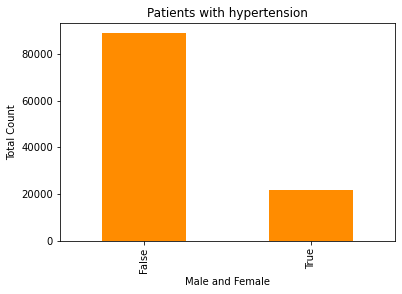

In [79]:
#Barchart for hypertension

df.hypertension.value_counts().plot(kind='bar', color='darkorange')
plt.title('Patients with hypertension')
plt.xlabel('Male and Female')
plt.ylabel('Total Count')


Majority of the patients do not suffer from hypertension as only 20% experience hypertension condition.

In [80]:
#Getting to know no show by gender
hypertsn = df.groupby('hypertension')['no_show'].value_counts()
print(hypertsn)

hypertension  no_show
False         0          70179
              1          18547
True          0          18029
              1           3772
Name: no_show, dtype: int64


Text(0.5, 1.0, 'Hypertension affecting in missed appointments')

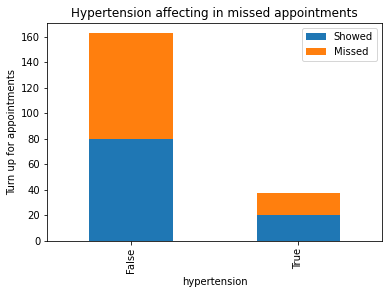

In [83]:
#Stacked bar chart showing hypertension of no show
(hypertsn/hypertsn.groupby(level=1).sum()*100).unstack().plot(kind='bar', stacked='True')
plt.legend(['Showed','Missed'])
plt.ylabel('Turn up for appointments')
plt.title('Hypertension affecting in missed appointments')

Patients having hypertension are more likely to turn up for appointments but the rate is small.


#  5.0 Conlusions

Results: From the above analysis we can oberve that:

   -There are 13 independent variables and one dependent variable(no show)
   
   -Patients in age brackets (10-20), (20-30),and (110-120) are more likely to miss their appointments. Children and patients      in their 60s, 70s and 80 are more likely to show up for their appointments.
   
   -There is no correlation between the gender of a patient and missing appointments. This is because the ratio of males and      females missing appointments is relatilvely the same.
   
   -Patients having hypertension are more likely to turn up for appointments but the rate is small.
   
Limitation:

Most of the data is categorical , therefore it is not easy to establish a strong correlation between the factors affecting no shows.


I used kaggle website(where the data was downloaded from) to get the description of the columns of the dataset.